<a href="https://colab.research.google.com/github/ashahdeen/Linear-Discriminant-Analysis-Application/blob/main/LDA_lesson_Plan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LINEAR DISCRIMINANT ANALYSIS.**



* Discriminant analysis is a technique that is used for dimensionality reduction, classification, and data visualization. 

* It is used to reduce the number of variables in a dataset while retaining  all the information or as much information as possible.

* Linear Discriminant Analysis is  most commonly used for supervised classification problems




## Application of LDA in the real world

* Face Recognition

It is a widely used application for computer vision, where every face represented with large pixel values. Here LDA reduces the number the number of features and make it more managable.Every one of the new dimensions is a linear combination of pixel values, which form a template.

* Marketing

It is used in marketing to identify the factors that differentiate between various types of consumers and/or products, based on data collected on in store.

* Medical Field.

LDA is used to classify the state of the patients for disease as mild, moderate, or severe based on fewer parameters and the treatment of the patoent is going as scheduled.

etc


## Objectives of Linear Discriminant Analysis.
 

1.   Development of discrimination function, or linear combination of predictor or independent variables, which will best discriminate between categories of criterion or dependent group.

2.   Checks to see whether there are any disparities between the characterized groups.



#Data Description

We will use the Iris dataset  to show a step by step implemetation of Linear Discriminant Analysis

The Iris Dataset includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

This is the Link to the dataset[https://www.kaggle.com/uciml/iris]





###Loading Libraries

In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Loading Dataset

In [2]:
#load the dataset
Iris=pd.read_csv('/content/Iris.csv')
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#Checking the Dataset

In [3]:
#check the dataset
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#previewing the head of the dataset
Iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#previewing the tail of the dataset
Iris.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#checking column names
Iris.columns

#We have 6 columns in our Iris dataset.

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
#checking data types of our dataset
Iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
#checking the shape of our dataset
Iris.shape

(150, 6)

In [9]:
#Checking Species
Iris.Species.value_counts()
#We have 3 species of Iris.

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

#Data Cleaning

In [10]:
#making the columns uniform by removing whitespaces 
Iris.columns=Iris.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
Iris.columns

Index(['id', 'sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

In [11]:
#Drop Unnecessary Columns
#We will drop the Id column.
Iris=Iris.drop('id',axis=1)
Iris

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
#Checking for Missing values
Iris.isnull().any()
#We have no missing values in our dataset

sepallengthcm    False
sepalwidthcm     False
petallengthcm    False
petalwidthcm     False
species          False
dtype: bool

In [13]:
#Checking for duplicates
Iris.duplicated().sum()

3

In [14]:
#Drop duplicates from our dataset
Iris.drop_duplicates()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
cols=['sepallengthcm','sepalwidthcm','petallengthcm','petalwidthcm']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

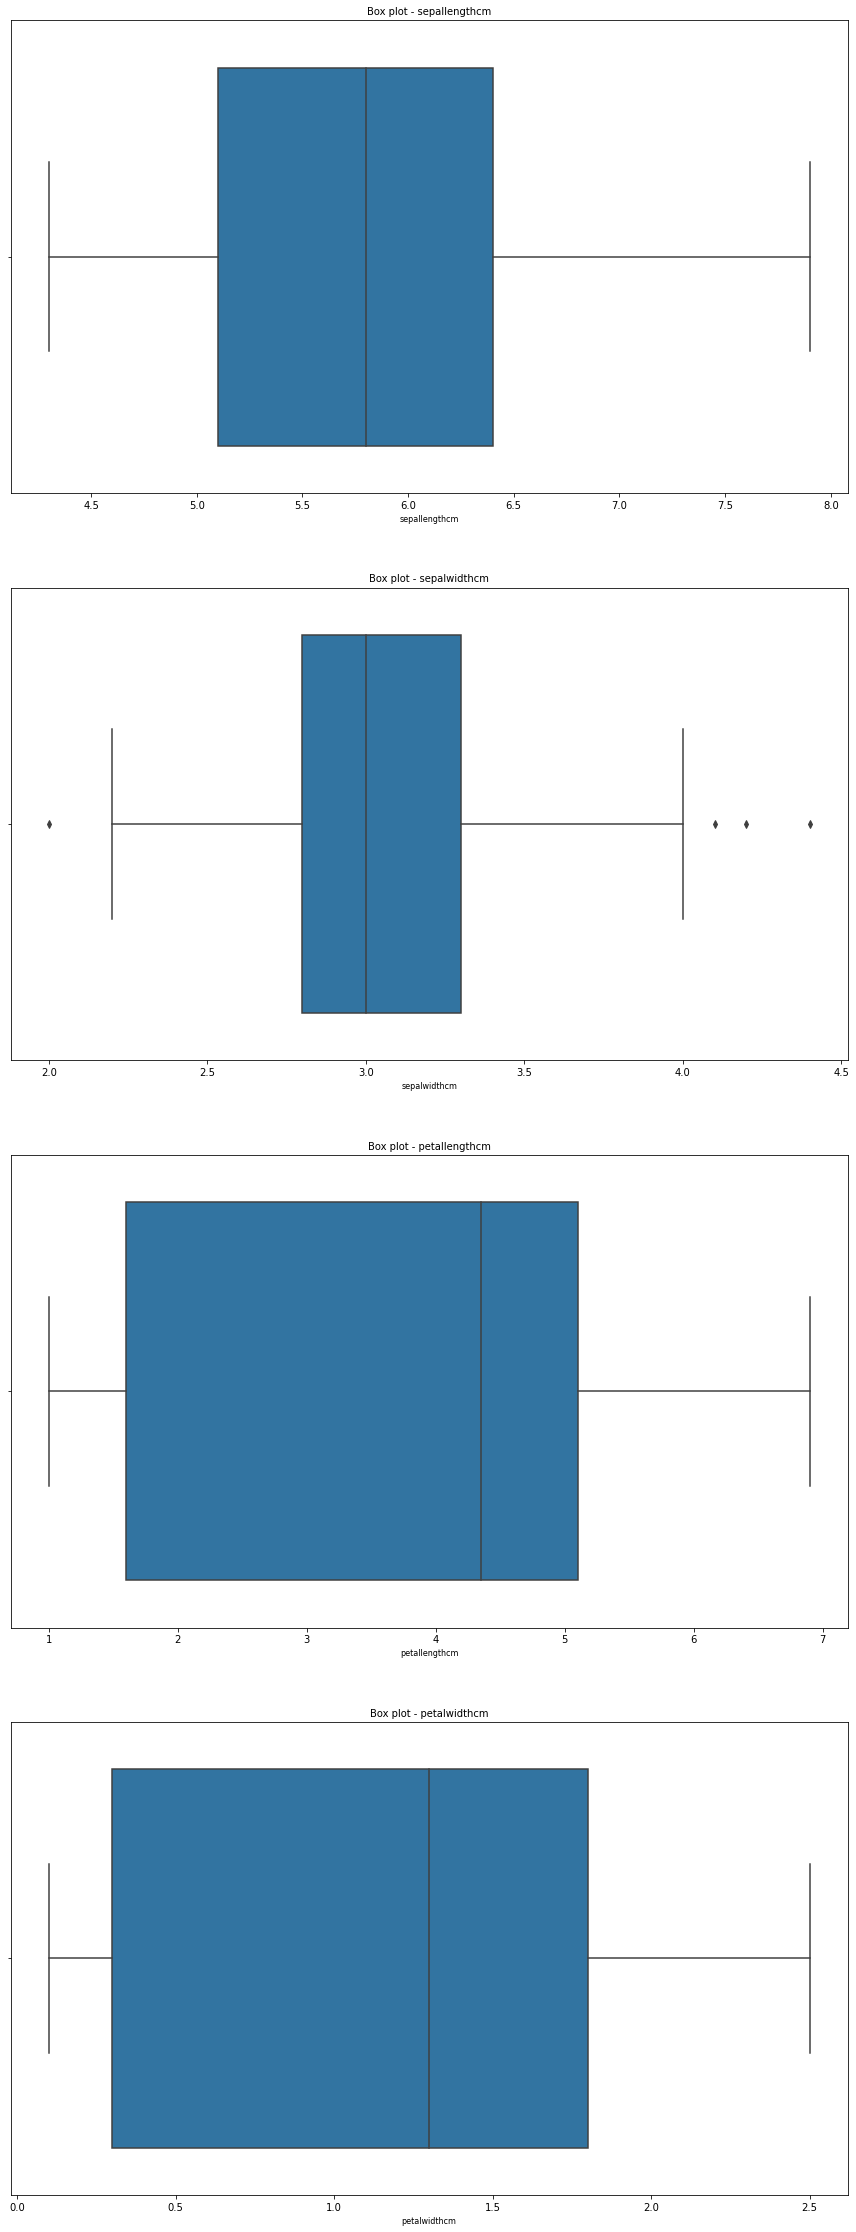

In [16]:
import seaborn as sns
fig, ax = plt.subplots(len(cols), figsize=(15,40))

for i, col_val in enumerate(cols):
    sns.boxplot(Iris[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

We have few outliers in sepalwidh column that we are going to remove since LDA is affected by outliers.

In [17]:
#Removing Outliers
Q1 = Iris.quantile(0.25)
Q3 = Iris.quantile(0.75)
IQR = Q3 - Q1

Iris = Iris[~((Iris < (Q1 - 1.5 * IQR)) |(Iris > (Q3 + 1.5 * IQR))).any(axis=1)]

# Exploratory Data Analysis

## Univariate Analysis
 
 * This is the analysis of one variable.
 * The purpose is to desscribe data and find patterns that exist within it

In [18]:
#descrbing our dataset
Iris.describe()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.036986,3.807534,1.219863
std,0.834093,0.395145,1.757117,0.760365
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [19]:
#measure of dispersion.
for i in cols:
  print(i)
  print("The skewness is:", Iris[i].skew())
  print("The kurtosis is:", Iris[i].kurt())
  s= abs(Iris[i].skew())
  if s > 1:
    print('highly skewed distribution')
  else:
    print('')
  k = Iris[i].kurt()
  if k >3:
    print('the distribution is heavy-tailed(leptokutic)')
  elif k < 3:
    print('Distribution is light tailed')
    print("******"*10)

sepallengthcm
The skewness is: 0.27841730000040843
The kurtosis is: -0.5859634785035093

Distribution is light tailed
************************************************************
sepalwidthcm
The skewness is: 0.14081170828794973
The kurtosis is: -0.24327514667496075

Distribution is light tailed
************************************************************
petallengthcm
The skewness is: -0.32364863848096104
The kurtosis is: -1.357825699297279

Distribution is light tailed
************************************************************
petalwidthcm
The skewness is: -0.14877741796208035
The kurtosis is: -1.3151309025950788

Distribution is light tailed
************************************************************


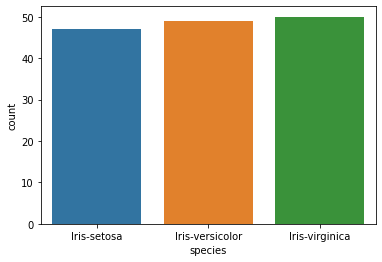

In [20]:
#a countplot showing Iris species
sns.countplot(x='species', data=Iris)
#Iris-virginic has the highest number of species followed closely by Iris-versicolor 

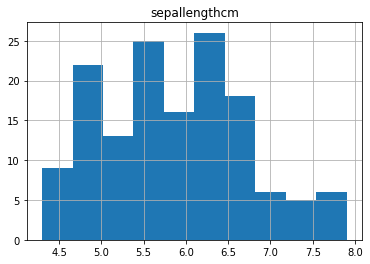

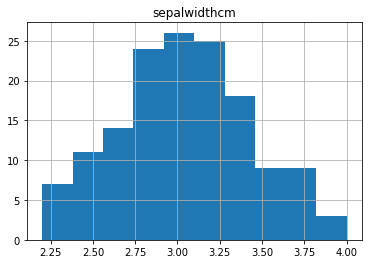

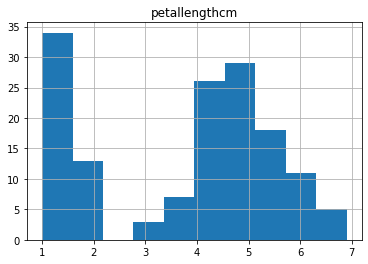

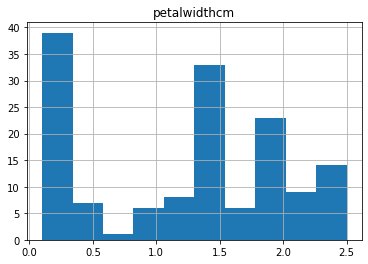

In [21]:
#we will use a for loop and a histogram inside it to show visual
for i in cols:
  Iris.hist(i)

# Bivariate Analysis
 
 * This is analysis where you are comparing two variables to study their relationship.

 * The variables could be dependent or independent to each other.

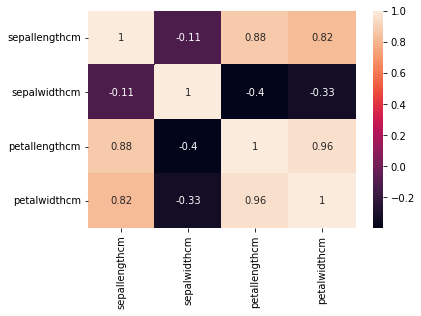

In [22]:
#a heatmap showing correlation between variables.
sns.heatmap(data=Iris.corr(),annot=True,vmax=1)

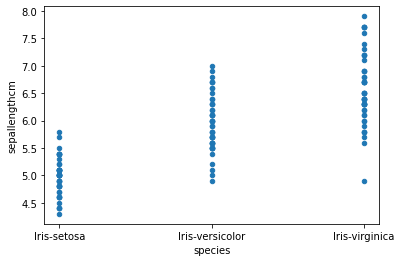

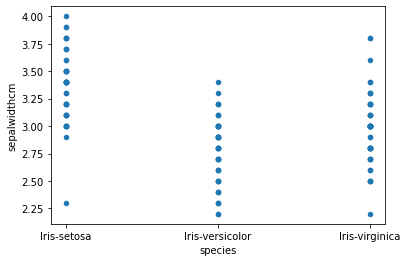

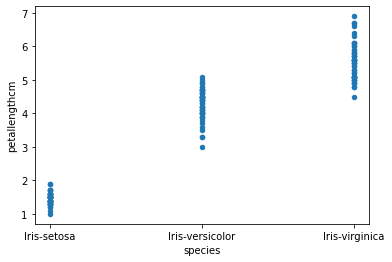

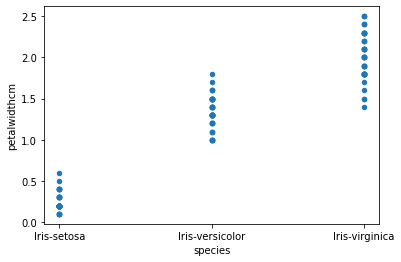

In [23]:
for i in cols: 
  Iris.plot(x = 'species', y = i, kind='scatter')

# Multivariate Analysis

* It is similar to Bivariate Analysis but Multivariate Analysis compares more than 2 variables.
 
* MuLtivariate Techniques.
1. Linear Discriminant Analysis.
2. Principal Component Analysis.
3. Factor Analysis.
4. Cluster Analysis.


etc
 

##LDA implementation

Once we have Loaded the dataset,checked the dataset to understand the dataset better and cleaned our data .

We will follow the following steps

* Step 1: Divide the dataset divide the dataset into class and targets.

* Step 2: Splitting the dataset into training and test sets.

* Step 3: Feature scaling

     * Feature scaling is a technique of bringing down the values of all the independent features of our dataset on the same scale.(A further explanation of Feature scaling https://medium.datadriveninvestor.com/feature-scaling-in-data-science-5b1e82492727
     )


* Step 4: Apply Linear Discriminant Analysis from Sklearn Library.


* Step 5: Performance of the model.

In [24]:
#Step 1
#Divide the dataset into class and target variable.
#We will use iloc to select columns from the dataset
#0:4 select from index 0 to 3
#4 selects the last column which is the species column.
X = Iris.iloc[:, 0:4].values
y = Iris.iloc[:, 4].values

In [25]:
#step 2
#Splitting data into train and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
#Step 3
# Feature scaling
# we will use standardization method to normalize our data.
#Standardization is scaling technique in which the mean will be equal to zero and the standard deviation equal to one
#We will use StandardScalar from the Sci-Kit learn library in our dataset.
#One of the assumption of LDA is that the data is normaly distributed.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
#step 4
#LDA Application
#We will use sklearn.discriminant_analysis library to Perform LDA .
#LDA has a parameter n_components
#n_components is number of components for dimensionality reduction.
#We will set the n_component as 1 to see the performance of our model with a single Linead Discriminant.
#For more information on Linear Discriminant Analysis check Sklearn guide [https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html]

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [28]:
#Step 5
#Making prediction
#We will Random Forest Classification to make predictions on our dataset.
#Random Forest is a classification algorithm consisting of many decisions tree.
#It uses averaging to improve the predictive accuracy and control over-fitting.
#


from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



In [29]:

#check performance of our model using confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

#Our model has an accuracy of 100% and correct prediction of 30 variables.

Accuracy : 1.0
[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


Conclusion



* Linear Dimensionality Analysis avoids the curse of dimensionality and reduces resources and dimensional costs.

* Linear Dimensionality Analysis has a more accurate conclusion.

* LDA is sensitive to outliers.

